https://keras.io/examples/nlp/pretrained_word_embeddings/

In [ ]:
pip install nltk

In [ ]:
pip install gensim

In [190]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec,KeyedVectors

import logging
import nltk
from nltk.corpus import brown   
import os 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [192]:
# read the words from your WordData.csv file
words = []
with open('WordData.csv', 'r') as f:       
    for line in f:
        if line.strip()=='Word':continue #Skip heading
        words.append(line.strip())
print("First 5 Words: ")
words[0:5]

First 5 Words: 


['development', 'plan', 'action', 'programme', 'training']

Training

In [193]:
sentences = brown.sents()
for vector_dims in np.arange(100,800,100):
	if not os.path.exists('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims)):
		model = gensim.models.Word2Vec(sentences, min_count=1,vector_size=vector_dims, window=5, workers=4)
		model.save('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims))
		print("Made Word2Vec Model of ", str(vector_dims), " dimensions")

In [196]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims))
print("First 10 dims of second word: ")
model.wv[words[1]][0:10]

First 10 dims of second word: 


array([ 0.06357365,  0.10217044, -0.10836624,  0.31423753, -0.19185057,
       -0.21745813,  0.07052517,  0.25704148,  0.02650036,  0.12899445],
      dtype=float32)

# Testing

Missing Words from the Corpus

In [198]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("Missing (removed) Words:")
for word in words:
	try:
		model.wv[word]
	except:
		print(word)
		words.remove(word)

# Make word pairs:
pairs = []
for i in range(int(len(words)/2 +1)):
	pairs.append([words[i], words[i+1]])
	i+=1
print("Example Pairs:")
pairs[0:3]

Missing (removed) Words:
Example Pairs:


[['development', 'plan'], ['plan', 'action'], ['action', 'training']]

In [199]:
model_100 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(100))
model_600 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(600))
model_700 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
np.dot(model_100.wv[words[1]],model_100.wv[words[2]]), np.dot(model_600.wv[words[1]],model_600.wv[words[2]]), np.dot(model_700.wv[words[1]],model_700.wv[words[2]])

(20.454416, 20.338585, 20.444256)

In [200]:
dot_prds = []
for dims in np.arange(100,800,100):
	model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
	dim_dot_prod = []
	for pair in pairs:
		dim_dot_prod.append(np.dot(model.wv[pair[0]],model.wv[pair[1]]))
	dot_prds.append(dim_dot_prod)
dot_prods = np.array(dot_prds)
dot_prods.shape

(7, 70)

Text(0, 0.5, 'Percentage Change from current dimension to 700')

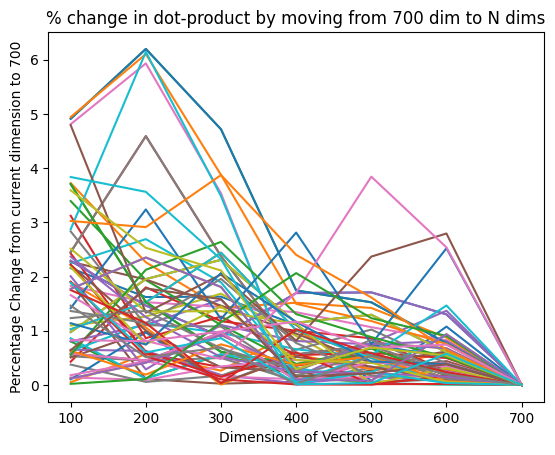

In [203]:
for word_dotprod in dot_prods.T:
	scaled_line = []
	for i, val in reversed(list(enumerate(word_dotprod))):
		try:
			if i == 0:
				scaled_line.append(val - val)
			else:
				scaled_line.append(100*abs((word_dotprod[0] - val)/word_dotprod[i-1]))
		except:
			pass
	plt.plot(np.arange(100,800,100), scaled_line)
plt.title("% change in dot-product by moving from 700 dim to N dims")
plt.xticks(np.arange(100,800,100))
plt.xlabel("Dimensions of Vectors")
plt.ylabel("Percentage Change from current dimension to 700")